[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import pandas as pd
import numpy as np

# Read the data

In [2]:
df = pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Don't forget to drop duplicates first

In [5]:
# check duplicated values
df.duplicated().sum()

194

In [6]:
# drop duplicated
df.drop_duplicates(subset=None, keep='first', inplace = True)

In [7]:
# recheck
df.duplicated().sum()

0

# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [9]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        1474
Height     9139
Weight     9609
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     35528
dtype: int64

### Number of males and females

In [11]:
df['Sex'].value_counts()

M    30537
F    10587
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [12]:
df['City'].value_counts()

London                    3564
Athina                    2307
Rio de Janeiro            2255
Sydney                    2129
Atlanta                   2093
Beijing                   2070
Seoul                     2015
Barcelona                 2006
Los Angeles               1915
Munich                    1615
Mexico City               1435
Montreal                  1399
Roma                      1298
Helsinki                  1235
Moskva                    1170
Tokyo                     1113
Paris                     1008
Berlin                     847
Antwerpen                  705
Stockholm                  698
Amsterdam                  688
Melbourne                  656
Sochi                      645
Torino                     632
Salt Lake City             573
Nagano                     545
Albertville                531
Vancouver                  498
Innsbruck                  466
Lillehammer                466
Calgary                    383
Lake Placid                295
Sarajevo

# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [14]:
df.groupby('Year')['ID'].count()

Year
1896.0      34
1900.0     283
1904.0     162
1906.0     217
1908.0     500
1912.0     650
1920.0     705
1924.0     793
1928.0     783
1932.0     396
1936.0     986
1948.0    1200
1952.0    1398
1956.0     915
1960.0    1438
1964.0    1334
1968.0    1659
1972.0    1844
1976.0    1644
1980.0    1420
1984.0    1852
1988.0    2398
1992.0    2537
1994.0     466
1996.0    2093
1998.0     545
2000.0    2129
2002.0     573
2004.0    2056
2006.0     632
2008.0    2070
2010.0     498
2012.0    2013
2014.0     645
2016.0    2255
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [26]:
df.groupby('Name').count()['Year'].max()

27

In [39]:
# the most Year for participated is 27 years for:
A = df.groupby('Name').count()['Year']
A[A==27]


Name
Ole Einar Bjrndalen    27
Name: Year, dtype: int64

In [49]:
df[df['Name']=="Ole Einar Bjrndalen"][['ID','Name','Sex']].iloc[0]

ID                    11951
Name    Ole Einar Bjrndalen
Sex                       M
Name: 22698, dtype: object

# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
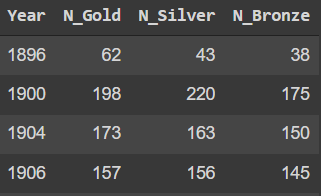

In [50]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [80]:
# make new data frame without NaN's
DF= df[df['Medal'].notnull()]

In [81]:
DF.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184,85.0,Finland,FIN,2014 Winter,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [96]:
DF = DF[['Year','Medal']]
DF.head()

,Year,Medal
3,1900.0,Gold
37,1920.0,Bronze
38,1920.0,Bronze
40,2014.0,Bronze
41,1948.0,Bronze


In [97]:
def gold(st):
  if st=="Gold":
    return 1
  else:
    return 0

In [101]:
def Silver(st):
  if st=="Silver":
    return 1
  else:
    return 0

In [102]:
def Bronze(st):
  if st=="Bronze":
    return 1
  else:
    return 0

In [104]:
DF['Gold'] = DF['Medal'].apply(gold)
DF['Silver'] = DF['Medal'].apply(Silver)
DF['Bronze'] = DF['Medal'].apply(Bronze)

DF.head()

,Year,Medal,Gold,Silver,Bronze
3,1900.0,Gold,1,0,0
37,1920.0,Bronze,0,0,1
38,1920.0,Bronze,0,0,1
40,2014.0,Bronze,0,0,1
41,1948.0,Bronze,0,0,1


In [108]:
# final Result
DF.groupby('Year').sum()

,Gold,Silver,Bronze
Year,,,
1896.0,7,5,1
1900.0,38,34,19
1904.0,13,23,18
1906.0,19,20,14
1908.0,44,44,43
1912.0,61,49,47
1920.0,65,74,63
1924.0,35,50,55
1928.0,50,48,43


In [107]:
# check result
DF[DF['Year']==1896]

,Year,Medal,Gold,Silver,Bronze
7353,1896.0,Silver,0,1,0
7498,1896.0,Gold,1,0,0
15999,1896.0,Bronze,0,0,1
22952,1896.0,Silver,0,1,0
23914,1896.0,Gold,1,0,0
23916,1896.0,Gold,1,0,0
24682,1896.0,Gold,1,0,0
24683,1896.0,Gold,1,0,0
32333,1896.0,Gold,1,0,0
32334,1896.0,Gold,1,0,0


# <font color='red'>**You are Geek!**</fond>

### What is the number of winners with the gold medal in each city?

In [110]:
# new DF with gold Medals
df_win= df[df['Medal'].notnull()]
df_win = df_win[df_win["Medal"]=="Gold"]
df_win.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176,85.0,Norway,NOR,1992 Winter,1992.0,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [116]:
# Result
df_win.groupby('City').count()['Medal']

City
Albertville                14
Amsterdam                  46
Antwerpen                  65
Athina                    112
Atlanta                    76
Barcelona                  78
Beijing                    89
Berlin                     46
Calgary                     8
Chamonix                    6
Cortina d'Ampezzo           8
Garmisch-Partenkirchen     11
Grenoble                    7
Helsinki                   36
Innsbruck                  19
Lake Placid                14
Lillehammer                21
London                    194
Los Angeles               129
Melbourne                  41
Mexico City                45
Montreal                   58
Moskva                     57
Munich                     52
Nagano                     22
Oslo                        8
Paris                      67
Rio de Janeiro            102
Roma                       47
Salt Lake City             35
Sankt Moritz                7
Sapporo                     5
Sarajevo                    7
Seoul

### Find the total missing data for each year?

In [117]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [118]:
missing_values = df.isnull()

In [119]:
grouped_by_year = missing_values.groupby(df['Year'])

In [120]:
missing_values_by_year = grouped_by_year.sum()

# print the result
print(missing_values_by_year)

        ID  Name  Sex  Age  Height  Weight  Team  NOC  Games  Year  Season  \
Year                                                                         
1896.0   0     0    0   18      32      32     0    0      0     0       0   
1900.0   0     0    0  115     275     276     0    0      0     0       0   
1904.0   0     0    0   28     139     149     0    0      0     0       0   
1906.0   0     0    0   83     190     200     0    0      0     0       0   
1908.0   0     0    0   94     420     425     0    0      0     0       0   
1912.0   0     0    0   22     523     559     0    0      0     0       0   
1920.0   0     0    0  113     598     632     0    0      0     0       0   
1924.0   0     0    0  166     652     701     0    0      0     0       0   
1928.0   0     0    0  151     640     685     0    0      0     0       0   
1932.0   0     0    0   29     206     328     0    0      0     0       0   
1936.0   0     0    0   28     831     870     0    0      0    